In [1]:
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../asyncroscopy/') # some problem with the init in utils
from clients.notebook_client import NotebookClient
import matplotlib.pyplot as plt

In [2]:
# Connect the Client to the central (async) server
tem = NotebookClient.connect(host='localhost',port=9000)

# this is broken right now:
# Tell the central server address of all connected instruments
# routing_table= {"AS": ("localhost", 9001),
#                 "Gatan": ("localhost", 9002),
#                 "Ceos": ("localhost", 9003),
#                 "Preacquired_AS": ("localhost", 9004)}
# tem.send_command('Central',"set_routing_table", routing_table)

Connecting to central server localhost:9000...
Connected to central server.


In [3]:
# connect to the AutoScript computer and initialize microscope
tem.send_command('AS',command='connect_AS',args={'host':'localhost','port':9001})


'Connected to Digital Twin microscope.'

In [4]:
stage = tem.send_command('AS',command='get_stage')
stage

array([-0.28839147,  9.942566  , -0.0448766 , -9.601914  , -3.7373972 ],
      dtype=float32)

In [5]:
tem.send_command('AS',command='get_status') # if no args provided, uses {}

'Microscope is Ready'

### Getting an image takes 5 seconds:

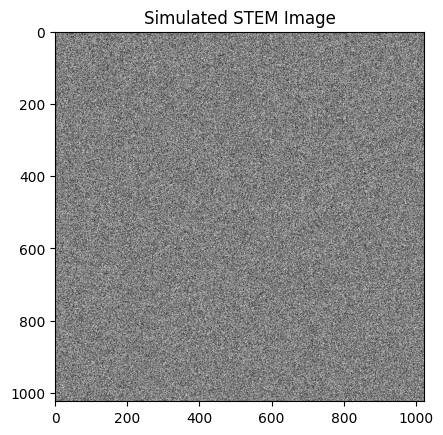

In [6]:
# works with images upt to size = 300 - working on it
image_args = {'scanning_detector':'HAADF',
                'size':1024,
                'dwell_time':10e-6}

img = tem.send_command('AS','get_scanned_image', image_args)

plt.imshow(img, cmap="gray")
plt.title("Simulated STEM Image")
plt.show()


### Getting a spectrum takes 3 seconds:

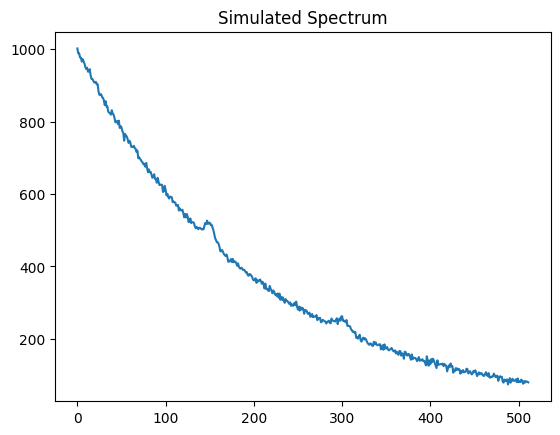

In [7]:
spec_args = {'size':512}

spec = tem.send_command('Gatan','get_spectrum', spec_args)
plt.plot(spec)
plt.title("Simulated Spectrum")
plt.show()

### Why not both at once?

In [ ]:
# add into central
# and check on "smart proxy"

In [8]:
image, spec = tem.take_dual_spec_image(image_args, spec_args)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(image, cmap="gray")
ax[1].plot(spec)



AttributeError: 'NotebookClient' object has no attribute 'take_dual_spec_image'